# AMIA 2016 Annual Symposium Workshop (WG13)

### Mining Large-scale Cancer Genomics Data Using Cloud-based Bioinformatics Approaches (RNAseq)

Riyue Bao, Ph.D. 
Center for Research Informatics,
The University of Chicago.
9:00 AM - 10:15 AM, November 13, 2016

***

The workshop materials are available on [Github](https://github.com/cribioinfo/CRI-Workshop-AMIA-2016-RNAseq) licensed via [LGPLv3](https://www.gnu.org/licenses/lgpl-3.0.en.html).

## Table of Contents: <a class="anchor" id="top"></a>
* [Objective](#01)
* [Dataset](#02)
* [1. RNAseq technology, clinical application and data analysis](#03)
	* [1.1 What is RNAseq and when to use it](#03.1)
    * [1.2 Challenges and limitations](#03.2)
* [2. How to perform RNAseq analysis](#04)
	* [Workflow](#04.1)
	* [2.1 - 2.2 Quality assessment and preprocessing of raw sequencing reads](#04.2)
	* [2.3 - 2.4 Map reads to reference genome and quantification of transcript abundance](#04.3)
	* [2.5 - 2.7 Normalize gene expression and identify DEGs: DESeq2](#04.4)
	* [2.8 Identify enriched GO and pathways: clusterProfiler](#04.5)
* [3. Practice how to associate gene expression with clinical data](#05)
	* [Workflow](#05.1)
	* [3.1 - 3.2. Import data, normalize expression and cluster patients based on expression profile](#05.2)
	* [3.3 Survival analysis](#05.3)
* [Summary](#06)
* [Run pipeline (after the workshop)](#07)

***

## Objective<a class="anchor" id="01"></a> <small>[[top](#top)]</small>

* **Introduction to RNAseq technology and clinical application** (10 minutes)
    * Learn the background and when to use RNAseq for your projects
* **How to perform RNAseq analysis** (50 minutes) *hands-on*
    * Learn the good-practice analysis protocol (**8 steps**)
        * From raw sequencing data to quantitative measures of transcripts (automated pipeline)
        * Identify differentially expressed genes (DEGs) between conditions and affected pathways (R & Bioconductor)
        * Generate high-quality figures for publication
* **Associate gene expression data with clinical outcome** (15 minutes) *hands-on*
    * Discover tumor subtypes and detect survival difference (**3 steps**) (R & Bioconductor)

<img src='notebook_ext/ipynb_data/assets/Figure24.png', title = 'RNAseq objective', width = 600, height = 600>

***

## Dataset<a class="anchor" id="02"></a> <small>[[top](#top)]</small>
* **Data for RNAseq analysis**
    * Two groups (*PRDM11* KO vs WT, human U2932 cells), 6 samples [1]
    * Aim to identify DEGs / pathways altered between KO and WT groups

| Sample | Group | Sequencing File | Sequencing Data |
|------|------|------|------|------|   
| KO01 | KO | KO01.fastq.gz | 74,126,025 reads |   
| KO02 | KO | KO02.fastq.gz | 64,695,948 reads |   
| KO03 | KO | KO03.fastq.gz | 52,972,573 reads |   
| WT01 | WT | WT01.fastq.gz | 55,005,729 reads |   
| WT01 | WT | WT02.fastq.gz | 61,079,377 reads |   
| WT01 | WT | WT03.fastq.gz | 66,517,156 reads |  

* **Data for clinical association**
    * The Cancer Genome Atlas (TCGA) ovarian cancer, 379 primary tumors **[Genomics Data Commons](https://gdc-portal.nci.nih.gov)** [2]
    * Aim to use gene expression to group patients into subtypes and detect survival differences
    * **TCGA datasets** (35 cancer types, > 20,000 tumor/normal samples, > 9,000 patients)
<img src='notebook_ext/ipynb_data/assets/Figure23.2.png', title = 'GDC', width = 600, height = 600>

***

## 1. RNAseq technology, clinical application and data analysis<a class="anchor" id="03"></a> <small>[[top](#top)]</small>

### Biological and clinical questions

* I am interested in studying transcriptional landscape shift before and after drug treatment in cell lines
* I want to identify which pathways are affected after knocking down my favorite gene in mice
* I have expression data of clinical isolates collected at various time points, when patient's response changed. Why?
* I have a cohort of patients and want to discover which gene signature predicts patient's response to treatment
* I want to detect gene fusions, expressed mutations, and disrupted isoforms in tumors that may be related to disease    

... and more!

### 1.1. What is RNAseq and when to use it<a class="anchor" id="03.1"></a> <small>[[top](#top)]</small>
<img src='notebook_ext/ipynb_data/assets/Figure14.png', title = 'A typical RNAseq experiment', width = 800, height = 400>
* **High-throughput sequencing of RNA: Profile, identify or assemble transcripts**
    * **Detect gene expression changes between conditions** (hands-on)
    * Identify novel splice sites / exons, mutations, fusion genes, etc.
    * Broad detection range (lowly to highly expressed genes), high sensitivity, low requirement of RNA amount
    * Available for all species (reference genome is optional): reference genome-guided alignment or *de novo* assembly
    * Transcriptome-wide approach for quantitative measurements and gene discovery without prior knowledge
* **Experimental Design** ([considerations and limitations](https://github.com/cribioinfo/CRI-Workshop-AMIA-2016-RNAseq/tree/master/notebook_ext/ipynb_data/assets/Figure13.png))
    * Include biological replicates for increased discovery power
<img src='notebook_ext/ipynb_data/assets/Figure15.2.png', title = 'Biological replicates', width = 400, height = 400>

### 1.2 Challenges and limitations<a class="anchor" id="03.2"></a> <small>[[top](#top)]</small>
* Relatively poor RNA quality for tumor FFPE samples
* Contamination from adjacent normal tissue
* Still more expensive than targeted-panel sequencing such as NanoString
* 40 million mapped reads are usually sufficient for gene profiling, but > 80 million are required to detect bottom 1% lowly expressed genes [3]

***

## 2. How to perform RNAseq analysis<a class="anchor" id="04"></a> <small>[[top](#top)]</small>

<img src='notebook_ext/ipynb_data/assets/Figure20.2.png', title = 'RNAseq analysis', width = 800, height = 400>

### Workflow 

The best-practice analysis protocol takes 8 major steps. For a more detailed description and program commands used in each step, refer to the extended version of notebooks (`notebook_ext/01.Run_RNAseq.tutorial.ipynb`).

* Steps 1-4: From raw sequencing to transcript quantification is **automated through [BigDataScript](https://pcingola.github.io/BigDataScript/) (BDS) pipeline**.
* Steps 5-8: DEG and pathway analysis will be practiced **interactively to better interpret the results**.

<img src='notebook_ext/ipynb_data/assets/Figure25.png', title = 'RNAseq workflow', width = 900, height = 900>

Due to time limit, we will not run the BDS pipeline in this workshop. Since it is automated, participants are encouraged to explore it after the workshop following the instructions at [GitHub](https://github.com/cribioinfo/CRI-Workshop-AMIA-2016-RNAseq/pipeline). The launching of the pipeline only requires submission of one script `Build_RNAseq.sh`, which was already prepared for you. The pipeline was designed to **take care of all the dependencies between tasks/jobs with robust checkpoints and high reproducibility**. 

### Steps 1-4

***

### 2.3.1 - 2.3.2 Quality assessment and preprocessing of raw sequencing reads<a class="anchor" id="04.2"></a> <small>[[top](#top)]</small>

* **Raw sequencing reads** are stored in FastQ format (e.g. `KO01.fastq.gz`), where each read is presented by 4 lines
<img src='notebook_ext/ipynb_data/assets/Figure10.png', title = 'Sequencing reads in FastQ format', width = 600, height = 90>
* QC produces reports that help you evaluate if a sequencing run is successful and if reads are of high quality (example in `notebook_ext/01.Run_RNAseq.tutorial.ipynb`, *MultiQC*)
* *Optional* Preprocess reads to improve mapping rate and accuracy (in the next step, 1.3.3)
    * Trim low-quality bases, clip adapters, etc.
    * Avoid overtrimming in RNAseq! ([Williams et al. 2016](http://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-016-0956-2))

***
### 2.3.3 - 2.3.4 Map reads to reference genome and quantification of transcript abundance<a class="anchor" id="04.3"></a> <small>[[top](#top)]</small>
* Read mapping identifies the location in the genome where a sequencing read comes from
* Accurate mapping result is the key for quantification and DEG identification
* **splice-aware aligner** (e.g. [STAR](https://github.com/alexdobin/STAR))
<img src='notebook_ext/ipynb_data/assets/Figure12.png', title = 'RNAseq mapping result', width = 600, height = 400>
* **Different aligners may generate very different results** ([Engström et al. 2013](http://www.nature.com/nmeth/journal/v10/n12/full/nmeth.2722.html))

***
### RNAseq metrics
* Collect metrics to evaluate RNA sample quality and identify potential problems (example in `notebook_ext/01.Run_RNAseq.tutorial.ipynb`, *MultiQC*)
    * **Is there high-level genomic DNA contamination?**
    * **Was ribosome RNA successfully depleted during library prep?**
    * Is the RNA highly degraded?
    * How do reads distribute on the genome? (exons, introns, intergenic, etc.)
    * Does the target gene knocked down in KO samples have reduced expression as expected?   

*For detailed answers to those questions, refer to the extended version of notebooks* (`notebook_ext/01.Run_RNAseq.tutorial.ipynb`)

<blockquote>
Q1: Which sample (S1-4) has the most severe contamination from genomic DNA?   
Hint: higher percentage of intergenic reads indicates more severe DNA contamination in RNA samples
</blockquote>
<blockquote>
Q2: Which sample (S1-4) has the least efficient depletion of ribosome RNAs (rRNAs)?   
Hint: rRNAs account for > 80% of the whole transcriptome. If not removed, the majority of the sequencing reads will be derived from rRNA and not the coding or lincRNAs.
</blockquote>
<img src='notebook_ext/ipynb_data/assets/Figure5.png', title = 'Figure5', width = 600, height = 600>

### Steps 5-8

* From the pipeline run, we generated read alignment and counts for every annotated gene on the genome
* The next step is to utilize the read counts data to detect DEGs
* For example, if we visualize *FOS* gene across 6 samples in genome browser (e.g. [IGV](http://software.broadinstitute.org/software/igv/))

<img src='notebook_ext/ipynb_data/assets/Figure16.png', title = 'KO vs WT read coverage FOS', width = 600, height = 600>

## Hands-on practice START

* **<font color='red'>Due to time constraints, and to facilitate workshop demo, small R script snippets were prepared to simplify steps described in hands-on</font>**
* Those scripts can be found in directory `notebook_ext/ipynb_data/Rscripts`, e.g. `DESeq2.plot_PCA.R`
* Contents of those snippets will not be covered in this workshop but detailed comments were added to every `R` script 
* Full length description & R code is provided in `notebook_ext/02.Run_RNAseq.tutorial.ipynb`

***
### 2.3.5 - 2.3.7 Normalize gene expression and identify DEGs: DESeq2<a class="anchor" id="04.4"></a> <small>[[top](#top)]</small>

Involves five sub-steps in [R](https://www.r-project.org/about.html) (i to v).

**To systematically identify significant DEGs across the transcriptome, we will use [DESeq2](http://bioconductor.org/packages/release/bioc/html/DESeq2.html)**
* Different tools (`edgeR`, `limmavoom`) may generate different results! [Seyednasrollah F et al. 2015](https://dx.doi.org/10.1093/bib/bbt086)
* We will also practice how to generate publication-quality figures such as PCA, heatmap, clustering, and pathways from our data

**Good coding practice**
* One statement each line for clarity. It is possible to concatenate statements with `;` but not recommended
* Break long statements into multiple lines with less than 80 columns per line for better readability!

***
### i. Prepare working environment and set up parameters
* Set up global variables at the beginning, avoid hard-coding of file names, directories, etc.
* Can easily apply to other projects with similar experimental design

In [1]:
##-- Clean the environment: always run this before starting new analysis!
rm(list=ls())

##-- Load libraries required in this analysis
##-- Those packages were pre-installed in the AWS machine
pkg.list <- c('ggplot2', 'RColorBrewer', 'reshape', 'broom',
             'DESeq2', 'vsn', 'genefilter', 'pheatmap',
             'clusterProfiler', 'pathview', 'IRdisplay')
for(pkg in pkg.list) {
    suppressMessages(library(pkg, character.only = TRUE))
}

##-- Parameters
cancer <- 'DLBC' ## full name
fdr <- 0.05 ## false-discovery rate adjusted p-value
fc <- 1.5 ## expression fold of change
gene.type <- 'coding' ## protein-coding genes
caller <- 'deseq2'
group1 <- 'KO' ## knockout
group2 <- 'WT' ## wild-type
colors <- c('#CC0000', '#00CC00')

##-- Set up working directory
work.dir <- '.'
setwd(work.dir)

##-- Input/Output directories
in.dir <- 'notebook_ext/ipynb_data/input'
out.dir <- 'notebook_ext/ipynb_data/output'

##-- Input/Output files
expr.file <- paste0(cancer, '.raw_counts.coding.tsv')
sample.file <- paste0(cancer, '.sample_group.tsv')

##-- Print analysis info
script <- file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.print_info.R')
source(script)

[1] "Cancer = DLBC"
[1] "gene type = coding"
[1] "DEG fdr cutoff = 0.05"
[1] "DEG fc cutoff = 1.5"
[1] "Expression file = DLBC.raw_counts.coding.tsv"
[1] "Sample group file  = DLBC.sample_group.tsv"


***
### ii. Import data
* Read counts on coding genes 
* Sample groups

In [2]:
##-- Read data files
data.expr <- read.delim(file.path(in.dir, expr.file), header=TRUE, 
                       stringsAsFactors=FALSE)
data.sample <- read.delim(file.path(in.dir, sample.file), header=TRUE, 
                         stringsAsFactors=FALSE)

print('Show the first three lines of gene expression file:')
data.expr[1:3,]
print('Show the sample group file:')
data.sample

[1] "Show the first three lines of gene expression file:"


ENSEMBL,SYMBOL,KO01,KO02,KO03,WT01,WT02,WT03
ENSG00000000003.14,TSPAN6,3,1,4,0,0,0
ENSG00000000005.5,TNMD,0,0,0,0,0,0
ENSG00000000419.12,DPM1,3197,2318,1356,2630,2735,2721


[1] "Show the sample group file:"


Sample,Group
KO01,KO
KO02,KO
KO03,KO
WT01,WT
WT02,WT
WT03,WT


***
### iii. Principle Component Analysis (PCA)
* Both are good assessment to identify mislabeled samples and outliers
* All genes are used as input!
* PCA - do samples group as expected? 

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

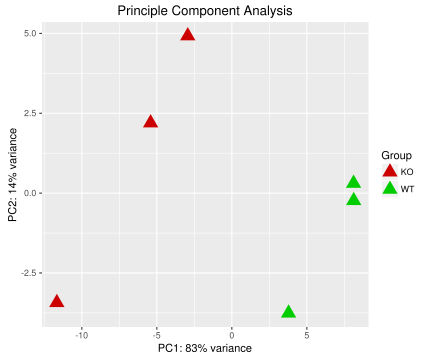

In [3]:
##-- Format data matrix
script <- file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.format_data.R')
source(script)

##-- DESeq2: build DESeqDataSet object, prepare design matrix
dds <- DESeqDataSetFromMatrix(countData = as.matrix(data.expr.proc),
                             colData = data.sample, 
                             design = ~ Group)
# print(dds)

##-- DESeq2: normalize matrix for clustering/heatmap generation
vsd <- varianceStabilizingTransformation(dds, blind=FALSE)

##-- DESeq2: correlation between bio replicates (skip in workshop)
# script <- file.path('notebook_ext','ipynb_data','Rscripts',
# 'DESeq2.plot_SMcor_heatmap.R')
#source(script)

##-- DESeq2: Principal component analysis (PCA) plot
script <- file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.plot_PCA.R')
source(script)

***
### iv. Normalize and detect DEGs
* Normalize read counts across samples
* **<font color='red'>Build design matrices for linear modeling</font>**   

| KO | WT |   
|------|------|    
| 1 | 0 |   
| 1 | 0 |   
| 1 | 0 |   
| 0 | 1 |   
| 0 | 1 |   
| 0 | 1 |   

* Fit data to a linear model
* Lowly expressed genes are automatically filtered out (default as mean read counts < 10)
* Estimate the **KO vs WT** fold-change and p-values for each gene 

In [4]:
##-- DESeq2: set up variables
script <- file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.set_variable.R')
source(script)

##-- DESeq2: fit the model and identify DEGs
print('Running DESeq2 ... ')
dds <- DESeq(dds, test="Wald", betaPrior=TRUE)
res <- results(dds, 
              contrast=c("Group",group1,group2), 
              pAdjustMethod ="fdr", 
              alpha=fdr)
print('Done!')

##-- DESeq2: peek into DEG data object
summary(res)
res <- as.data.frame(res)

##-- DESeq2: add anti-log2 fold change and gene symbol to output
script <- file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.add_fc_symbol.R')
source(script)

print('Show the first three lines of DESeq2 output:')
res.print[1:3,]

[1] "Group 1 = KO"
[1] "Group 2 = WT"
[1] "Running DESeq2 ... "


estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


[1] "Done!"

out of 16790 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)     : 1010, 6% 
LFC < 0 (down)   : 1038, 6.2% 
outliers [1]     : 1, 0.006% 
low counts [2]   : 4190, 25% 
(mean count < 10)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "Show the first three lines of DESeq2 output:"


ENSEMBL,SYMBOL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,foldChange
ENSG00000000003.14,TSPAN6,1.449331,0.1551665,0.08359604,1.856147,0.06343258,NA,1.113550
ENSG00000000005.5,TNMD,0.000000,NA,NA,NA,NA,NA,NA
ENSG00000000419.12,DPM1,2427.048731,-0.2017824,0.12436288,-1.622529,0.10469004,0.2767594,-1.150118


***
### v. Filter for significant DEGs and plot heatmap
* Filter for significant DEGs with at least 1.5 fold-change and FDR-adjusted p-value < 0.05
* Generate expression heatmap on significant DEGs (different from PCA and correlation heatmap described in iii)

[1] "Show the first three lines of DESeq2 output:"


ENSEMBL,SYMBOL,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,foldChange
ENSG00000000003.14,TSPAN6,1.449331,0.1551665,0.08359604,1.856147,0.06343258,NA,1.113550
ENSG00000000005.5,TNMD,0.000000,NA,NA,NA,NA,NA,NA
ENSG00000000419.12,DPM1,2427.048731,-0.2017824,0.12436288,-1.622529,0.10469004,0.2767594,-1.150118


[1] "Genes removed = 7245 (fold change is NA)"
[1] "Genes kept = 12599"
[1] "Filter DEGs by: fc, 1.5, fdr 0.05"
[1] "Genes non-significant = 12303 (fc, 1.5, fdr 0.05)"
[1] "Genes significant = 296"
[1] "Heatmap = 296 genes on the row, 6 samples on the column"


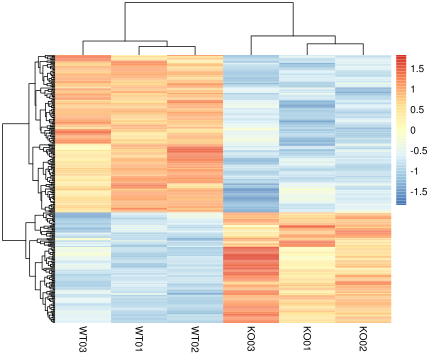

In [5]:
##-- DESeq2: filter significant DEGs by fc 1.5 and adjusted p < 0.05
print('Show the first three lines of DESeq2 output:')
res.print[1:3,]
script <- file.path('notebook_ext','ipynb_data','Rscripts',
                   'DESeq2.flt_sigDEGs.R')
source(script)

##-- DESeq2: plot sig DEG heatmap
print(paste0('Heatmap = ', nrow(data.plot), ' genes on the row, ', 
             ncol(data.plot), ' samples on the column'))
pheatmap(data.plot,
         scale = 'row',
         cluster_rows = TRUE, cluster_cols = TRUE,
         show_rownames = FALSE, show_colnames = TRUE,
         clustering_distance_rows = "euclidean",
         clustering_distance_cols = "euclidean", 
         clustering_method = "complete",
        )

***
### 2.3.8 Identify enriched GO and pathways: clusterProfiler<a class="anchor" id="04.5"></a> <small>[[top](#top)]</small>
* Gene Ontology bological processes and KEGG pathways
* Enrichment in significant DEGs

'select()' returned 1:many mapping between keys and columns
Warning message in bitr(geneID = genes.all$SYMBOL, fromType = "SYMBOL", toType = c("ENTREZID"), :
“0.9% of input gene IDs are fail to map...”

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue
GO:1902105,GO:1902105,regulation of leukocyte differentiation,17/269,153/11041,1.793987e-07,0.0003200531,0.0002676516
GO:1903706,GO:1903706,regulation of hemopoiesis,20/269,211/11041,2.062198e-07,0.0003200531,0.0002676516
GO:0002761,GO:0002761,regulation of myeloid leukocyte differentiation,11/269,69/11041,7.631931e-07,0.0007896505,0.0006603629


,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
hsa05322,hsa05322,Systemic lupus erythematosus,12/145,70/4637,1.239854e-06,0.0002653287,0.0002531912,8970/8365/8347/8349/8356/440689/7124/8339/8358/8367/8343/8357,12
hsa04620,hsa04620,Toll-like receptor signaling pathway,10/145,80/4637,1.654245e-04,0.0177004237,0.0168907142,6696/2353/3725/7124/6351/9560/388372/6349/414062/6348,10
hsa05132,hsa05132,Salmonella infection,9/145,69/4637,2.550959e-04,0.0181968390,0.0173644209,3606/2353/3725/6351/9560/388372/6349/414062/6348,9


'select()' returned 1:1 mapping between keys and columns
Info: Working in directory /home/ubuntu/CRI-Workshop-AMIA-2016-RNAseq
Info: Writing image file hsa04010.gene_all.pathview.png


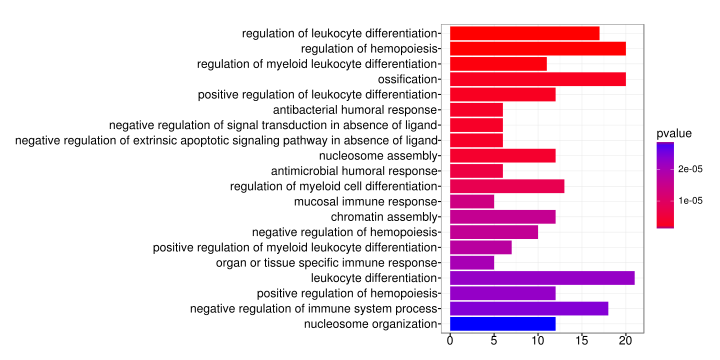

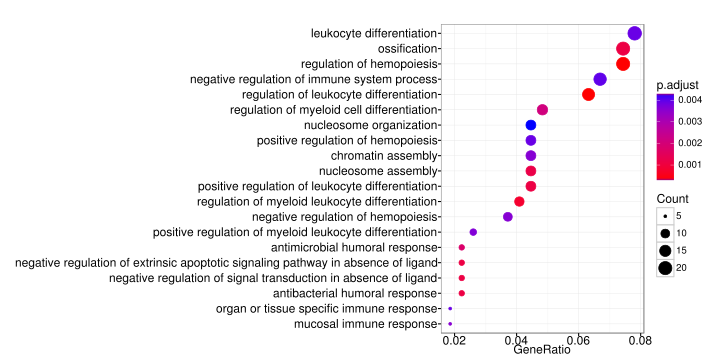

In [6]:
##-- clusterProfiler: NOTE those commands were tested for clusterProfiler 
##-- version 3.0.5 or above. Older versions may not work as they have 
##-- options revised/removed in the new versions.

##-- clusterProfiler: prepare input for GO/KEGG enrichment analysis
script <- file.path('notebook_ext','ipynb_data','Rscripts',
                   'clusterProfilter.prepare_input.R')
source(script)

##-- clusterProfiler: GO over-representation test
##-- takes ~2 minutes .. skip in workshop!
# ego <- enrichGO( gene          = genes.sig.anno$ENTREZID,
#                 universe      = genes.all.anno$ENTREZID,
#                 OrgDb         = 'org.Hs.eg.db',
#                 ont           = "BP",
#                 pAdjustMethod = "fdr",
#                 pvalueCutoff  = 0.05,
#                 readable      = TRUE)
##-- instead, load already generated output
load(paste0(out.prefix, '.flt.fdr', fdr,'_fc',fc, '.enrichGO.RData'))
summary(ego)[1:3,1:7]

##-- clusterProfiler: KEGG over-representation test
##-- takes ~2 minutes .. skip in workshop!
# kk <- enrichKEGG(gene          = genes.sig.anno$ENTREZID,
#                  universe      = genes.all.anno$ENTREZID,
#                  organism      = "human",
#                  pAdjustMethod = "fdr",
#                  pvalueCutoff  = 0.05)
##-- instead, load already generated output
load(paste0(out.prefix, '.flt.fdr', fdr,'_fc',fc,'.enrichKEGG.RData'))
summary(kk)[1:3,]

##-- clusterProfiler: visualize pathway with all genes
gene.list <- genes.all.anno$foldChange
names(gene.list) <- genes.all.anno$ENTREZID
pathway <- 'hsa04010'
plot.title <- paste0(pathway, '.gene_all.pathview.png')
p4 <- pathview(gene.data  = gene.list,
              pathway.id = pathway,
              species    = "human",
              limit      = list(gene=4, cpd=1),
              kegg.dir   = paste0(out.dir,'/',caller),
              out.suffix = paste0('gene_all.pathview'))

##-- clusterProfiler: visualization of GO and KEGG enrichment results
barplot(ego, showCategory=20)
dotplot(ego, showCategory=20)

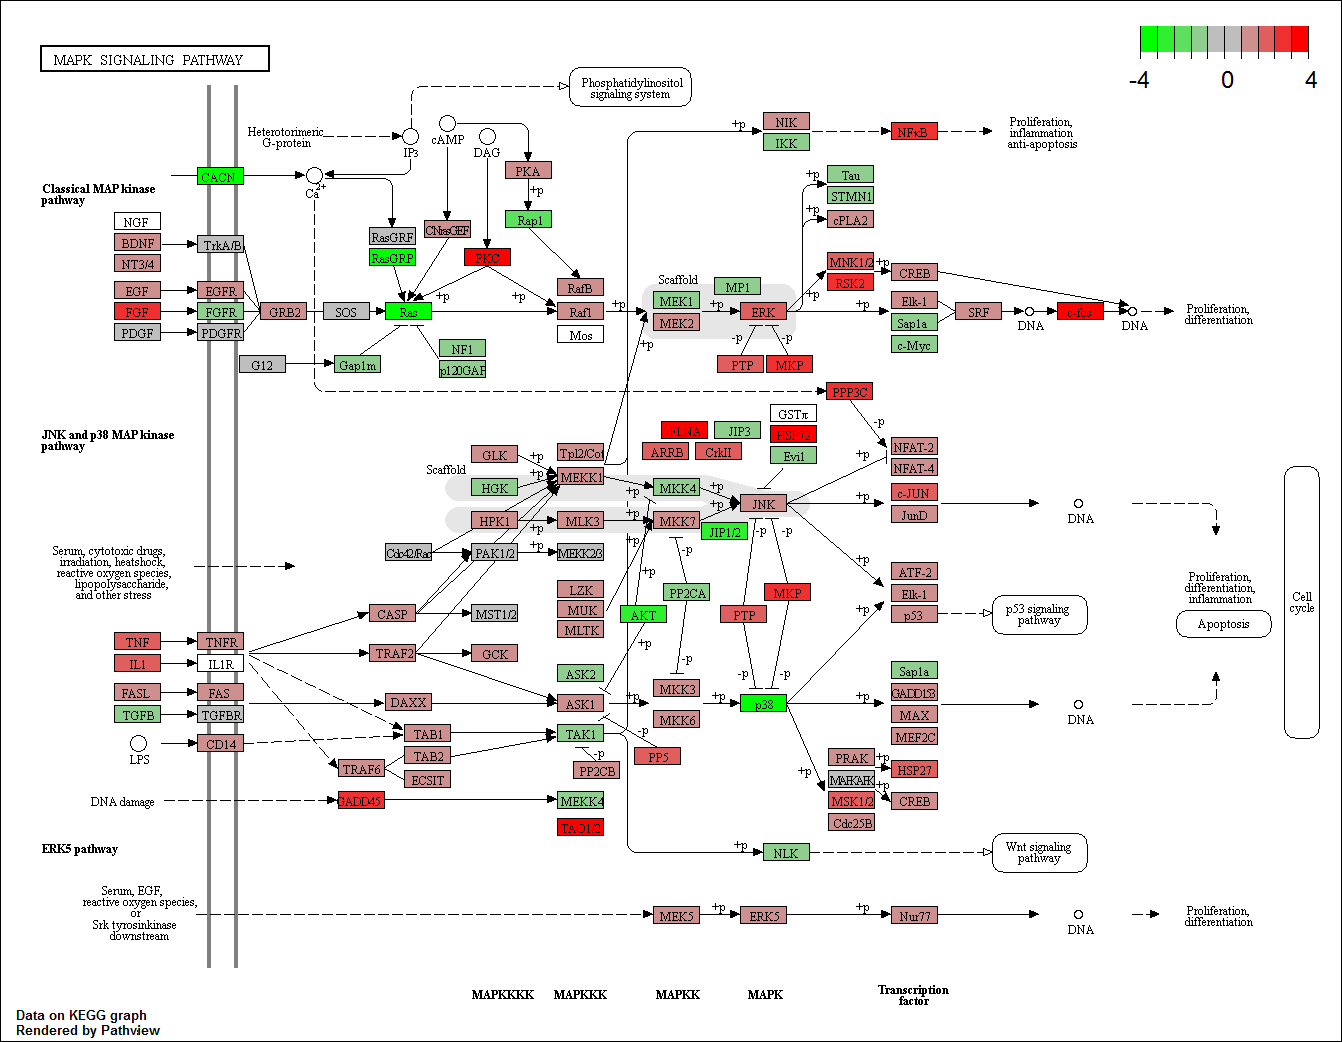

In [7]:
##-- KEGG pathwayview written into local files. Display the plot in R
display_png(file='notebook_ext/ipynb_data/assets/hsa04010.gene_all.pathview.png')

***

## 3. Practice how to associate gene expression with clinical data<a class="anchor" id="05"></a> <small>[[top](#top)]</small>  

* TCGA hosted on GDC (https://gdc-portal.nci.nih.gov)
<img src='notebook_ext/ipynb_data/assets/Figure19.png', title = 'GDC website', width = 800, height = 200>
* **Our data**
    * ~600 Ovarian Cancer patients (expression and clinical)
<img src='notebook_ext/ipynb_data/assets/Figure18.png', title = 'TCGA OV Nature paper', width = 800, height = 200>

### Workflow<a class="anchor" id="05.1"></a> <small>[[top](#top)]</small>  

The analysis takes 3 major steps. Full-length description & R code is provided in `notebook_ext/03.Run_RNAseq.tutorial.ipynb`.

<img src='notebook_ext/ipynb_data/assets/Figure26.png', title = 'TCGA & Clinical workflow', width = 900, height = 900>

***
### 3.1 - 3.2. Import data, normalize expression and cluster patients based on expression profile<a class="anchor" id="05.2"></a> <small>[[top](#top)]</small>

* Select 150 most variable genes for sample clustering
    * Without patient groups known, using all genes for sample clustering is computational intensive and may mask the true differences between potential sample groups
    * The most variable genes likely capture the majority of the sample variation   

[1] "Cancer = OV"
[1] "Expression file = TCGA_OV.mirna_expression.tsv"
[1] "Clinical file  = TCGA_OV.clinical.tsv"
[1] "Patients with complete clinical = 574"
[1] "Patients with gene expression = 594"
[1] "Overlap = 558"
[1] "========================================"
[1] "Show the first three rows of clinical file:"
        sample vital.status overall.survival.day age.at.diagnosis.year
4 TCGA.04.1336       LIVING                 1495                    55
5 TCGA.04.1338       LIVING                 1418                    78
7 TCGA.04.1346       LIVING                 1993                    73
  tumor.stage tumor.grade
4  Stage IIIB          G3
5  Stage IIIC          G3
7  Stage IIIC          G2
[1] "========================================"
[1] "Show the first three rows and left five columns of expression file:"
        gene TCGA.01.0628 TCGA.01.0630 TCGA.01.0631 TCGA.01.0633
1 DARKCORNER     4.858349     4.803304     4.590440     4.880881
2    DMR_285     9.768374     6.771561     

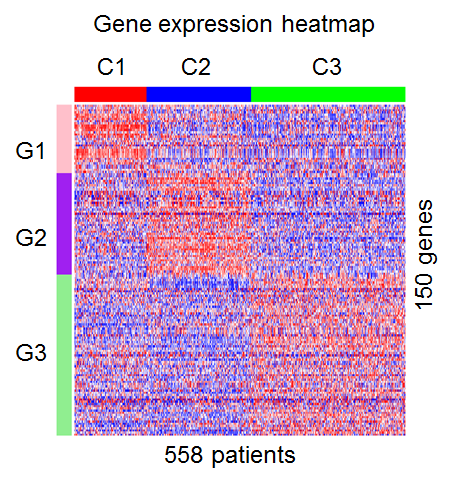

In [8]:
##-- Clean up environment
rm(list=ls())
set.seed(13)

##-- Load libraries required in this analysis
##-- Those packages were pre-installed in the AWS machine
pkg.list <- c('ggplot2', 'RColorBrewer', 'reshape', 'broom',
             'gplots', 'survival', 'NMF', 'IRdisplay')
for(pkg in pkg.list) {
    suppressMessages(library(pkg, character.only = TRUE))
}

##-- Parameters
cancer <- 'OV' 
gene.top.count <- 150

##-- Import data
script <- file.path('notebook_ext','ipynb_data','Rscripts',
                   'TCGA_OV.import_data.R')
source(script)

##-- run NMF to cluster samples & genes 
##-- (use 4 core 'p4', and print more info 'v')
##-- takes 15 minutes to run... skip in workshop
print('NMF clustering start...')
# expr.sub.nmf <- nmf(expr.sub, 
#                    rank = 3, 
#                    method = 'brunet', 
#                    seed = 'random', 
#                    nrun = 100, 
#                    .opt = 'vp4') 
##-- workshop only: load already generated result
load(paste0(out.dir,'/',expr.file,'.nmf.RData'))
print('Done!')

##-- plot expression heatmap
script <- file.path('notebook_ext','ipynb_data','Rscripts',
                   'TCGA_OV.plot_heatmap.R')
source(script)

# print(table(expr.sub.nmf.smclr$cluster))
# print(table(expr.sub.nmf.geneclr$cluster))

***
### 3.2 Survival analysis<a class="anchor" id="05.2"></a> <small>[[top](#top)]</small>

Involves two sub-steps in [R](https://www.r-project.org/about.html) (i to ii).

* Identify overall survival (OS) difference between the three tumor subtypes / patient groups
* Kaplan–Meier (KM) plot, log-rank test, and cox proportional hazards model (univariate and multivariate)   

### i. KM plot and log-rank test


DECEASED   LIVING 
     292      266 

[1] "========================================"

[1] "Running log-rank test for survival"


Call:
survdiff(formula = surv ~ clinical$cluster)

                     N Observed Expected (O-E)^2/E (O-E)^2/V
clinical$cluster=1 121       69     52.8      5.00      6.15
clinical$cluster=2 176       98     87.0      1.38      1.98
clinical$cluster=3 261      125    152.2      4.86     10.26

 Chisq= 11.4  on 2 degrees of freedom, p= 0.00341 

[1] "========================================"

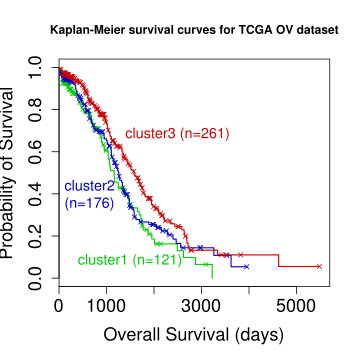

In [9]:
##-- Set up R plot display options in notebook
options(jupyter.plot_mimetypes = "image/svg+xml") 
options(repr.plot.width = 5, repr.plot.height = 5)

##-- add right censoring
table(clinical$vital.status)
clinical$censor <- NA
clinical$censor[which(clinical$vital.status == 'LIVING')] <- 0
clinical$censor[which(clinical$vital.status == 'DECEASED')] <- 1
clinical$censor <- as.numeric(clinical$censor)

##-- KM plot 
surv <- Surv(clinical$overall.survival.day, clinical$censor)
surv.fit <- survfit(surv ~ clinical$cluster)
plot(surv.fit, mark=4, col=c('#00CC00','#0000CC','#CC0000'), 
     lty=1, lwd=1.5,cex=0.8,cex.lab=1.5, cex.axis=1.5, cex.main=1,
     main='Kaplan-Meier survival curves for TCGA OV dataset',
     xlab='Overall Survival (days)', 
     ylab='Probability of Survival')
text(1500,0.08,  labels=paste0('cluster1 (n=',sample.counts[1,2],')'), 
     cex=1.2, col='#00CC00')
text(650,0.40, labels=paste0('cluster2\n(n=',sample.counts[2,2],')'), 
     cex=1.2, col='#0000CC')
text(2500,0.68, labels=paste0('cluster3 (n=',sample.counts[3,2],')'), 
     cex=1.2, col='#CC0000')

separator

##-- log-rank test
print(paste0('Running log-rank test for survival'))
surv <- Surv(clinical$overall.survival.day, clinical$censor)
surv.diff <- survdiff(surv ~ clinical$cluster)
surv.diff

separator

The KM plot is similar to TCGA OV paper Figure 2e.
** <font color='red'>Note that patient cluster C1 in the TCGA OV nature paper corresponds to C3 in our analysis!</font>**

<img src='notebook_ext/ipynb_data/assets/Figure27.png', title = 'TCGA OV Nature paper Fig 2e', width = 300, height = 300>

***
### ii. Cox multivariate and univariate model
* Include one factor of interest (e.g. cluster 1/2/3): univariate
* Include multiple factors such as cluster, age, tumor grade, and tumor stage: multivariate

In [10]:
##-- cox pp haz model (comparing cluster 2 and 3 as an example!)
print(paste0('Running Cox proportional hazards model for survival'))
clinical.sub <- clinical[clinical$cluster %in% c(1,2,3),]
surv <- Surv(clinical.sub$overall.survival.day, 
            clinical.sub$censor)

print('Cluster 1 will be set as baseline ... ')

separator

##-- univariate cox model 
print(paste0('(a) Univariate cox model for survival'))
m1 <- coxph(surv ~ (clinical.sub$cluster))
tidy(m1)

separator

##-- full cox model
print(paste0('(b) Full multivariate cox model for survival'))
m2 <- coxph(surv ~ (clinical.sub$cluster + 
                    clinical.sub$age.at.diagnosis.year +
                    clinical.sub$tumor.grade))
tidy(m2)

separator

##-- reduced cox model
##-- Always use the simplest model with the least necessary amount 
##-- of covariates to minimize overfitting
print(paste0('(c) Reduced multivariate cox model for survival'))
m3 <- coxph(surv ~ (clinical.sub$cluster +
                    clinical.sub$age.at.diagnosis.year))
tidy(m3)

[1] "Running Cox proportional hazards model for survival"
[1] "Cluster 1 will be set as baseline ... "


[1] "========================================"

[1] "(a) Univariate cox model for survival"


term,estimate,std.error,statistic,p.value,conf.low,conf.high
clinical.sub$cluster2,-0.1511201,0.1575786,-0.9590139,0.337551720,-0.4599685,0.1577283
clinical.sub$cluster3,-0.4701560,0.1507902,-3.1179473,0.001821154,-0.7656994,-0.1746126


[1] "========================================"

[1] "(b) Full multivariate cox model for survival"


term,estimate,std.error,statistic,p.value,conf.low,conf.high
clinical.sub$cluster2,-0.17618871,0.159280488,-1.1061538,0.2686599769,-0.488372730,0.13599531
clinical.sub$cluster3,-0.49421043,0.152268438,-3.2456524,0.0011718180,-0.792651084,-0.19576977
clinical.sub$age.at.diagnosis.year,0.01939655,0.005375269,3.6084804,0.0003079958,0.008861218,0.02993188
clinical.sub$tumor.gradeG2,0.33717216,0.728847771,0.4626098,0.6436440486,-1.091343225,1.76568754
clinical.sub$tumor.gradeG3,0.66495465,0.715362320,0.9295355,0.3526116503,-0.737129730,2.06703904
clinical.sub$tumor.gradeG4,1.39327398,1.232324618,1.1306063,0.2582208349,-1.022037893,3.80858585
clinical.sub$tumor.gradeGB,0.72658417,1.233218512,0.5891771,0.5557424449,-1.690479703,3.14364804
clinical.sub$tumor.gradeGX,0.94706274,0.842082368,1.1246676,0.2607299261,-0.703388377,2.59751385


[1] "========================================"

[1] "(c) Reduced multivariate cox model for survival"


term,estimate,std.error,statistic,p.value,conf.low,conf.high
clinical.sub$cluster2,-0.12718686,0.157630939,-0.8068648,0.4197443559,-0.436137827,0.18176410
clinical.sub$cluster3,-0.44820549,0.150838184,-2.9714326,0.0029641397,-0.743842901,-0.15256808
clinical.sub$age.at.diagnosis.year,0.01974086,0.005344462,3.6937042,0.0002210109,0.009265909,0.03021582


***
## Hands-on practice END

In [11]:
print('Program finished!')
sessionInfo()

[1] "Program finished!"


R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 14.04.5 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] NMF_0.20.6                 cluster_2.0.5             
 [3] rngtools_1.2.4             pkgmaker_0.22             
 [5] registry_0.3               survival_2.39-5           
 [7] gplots_3.0.1               IRdisplay_0.4.9000        
 [9] pathview_1.12.0            org.Hs.eg.db_3.3.0        
[11] AnnotationDbi_1.34.4       clusterProfiler_3.0.5     
[13] DOSE_2.10.7                

***

## Summary<a class="anchor" id="06"></a> <small>[[top](#top)]</small>

In this workshop, we demonstrated how to run RNAseq analysis to identify DEGs & pathways, and how to use expression data to identify patient groups with different clinical outcomes. We introduced the commonly used bioinformatics tools and good-practice approaches. All the analysis was performed on a pre-built machine in AWS EC2 cloud. 

All the class materials will stay open on [GitHub](https://github.com/cribioinfo/CRI-Workshop-AMIA-2016-RNAseq) if you want to practice or use the pipelines and scripts for your own research projects.

Questions? Post on Github or contact Riyue (Sunny) at `rbao AT bsd dot uchicago dot edu`.

<img src='notebook_ext/ipynb_data/assets/Figure21.png', title = 'RNAseq summary', width = 600, height = 600>

***

## Run pipeline (after the workshop)<a class="anchor" id="07"></a> <small>[[top](#top)]</small>

### 1. Open terminal from Jupyter Notebook

Go to your Jupyter Notebook homepage. Click [New] button at top right corner of the homepage. In the dropdown menu, click [Terminal]. 

### 2. Get familiar with the file structure

All workshop materials are openly accessible via [GitHub](https://github.com/cribioinfo/CRI-Workshop-AMIA-2016-RNAseq). Documentation and tutorials of the pipelines can be found in [README](https://github.com/cribioinfo/CRI-Workshop-AMIA-2016-RNAseq/tree/master/pipeline) and [wiki](https://github.com/cribioinfo/CRI-Workshop-AMIA-2016-RNAseq/wiki).

* **Run_RNAseq.tutorial.ipynb**: The main lecture / hands-on notebook (covered in workshop)
* **Run_RNAseq.tutorial.rendered.ipynb**: Same as above, but with all outputs & figures rendered
* **pipeline** directory: the automated, scalable and modularized pipeline 
    * From raw sequencing reads to quantified transcript abundance through one click
    * [`BigDataScript`](https://pcingola.github.io/BigDataScript/) & `Perl`
* **notebook_ext** directory: Extended notebooks 01-03 (not covered in workshop)
    * lecture notes
    * R codes and comments 

`##-- commands`   
`pwd`   
`cd ~/CRI-Workshop-AMIA-2016-RNAseq`   
`ll pipeline`   
`ll notebook_ext`   

### 2. Launch pipeline (takes ~ 5 minutes)

`##-- commands `   
`pwd`   
`cd ~/CRI-Workshop-AMIA-2016-RNAseq/pipeline`      
`cd test`   
`./Build_RNAseq.DLBC.sh`   
`##-- START Thu Oct 27 15:57:38 UTC 2016  Running ../Build_RNAseq.pl`   
`##-- START Thu Oct 27 15:57:38 UTC 2016  Running Submit_RNAseq.DLBC.sh`   
`##-- running ... 3 ~ 4 minutes`   
`##-- END Thu Oct 27 16:01:25 UTC 2016`      

***

## Next Session: ChIPseq analysis and Integration of RNAseq & ChIPseq (Kyle Hernandez PhD)

***

## References
[1] Fog. et al. 2015. [Loss of PRDM11 promotes MYC-driven lymphomagenesis](http://www.bloodjournal.org/content/125/8/1272.long?sso-checked=true). Blood 125(8):1272-81   
[2] The Cancer Genome Atlas Research Network. 2011. [Integrated genomic analyses of ovarian carcinoma](http://www.nature.com/nature/journal/v474/n7353/full/nature10166.html). Nature 474, 609–615)   
[3] Sims et al. 2014. [Sequencing depth and coverage: key considerations in genomic analyses](http://www.nature.com/nrg/journal/v15/n2/abs/nrg3642.html). Nature Reviews Genetics 15, 121–132
